About the data:

    Data was gathered from 552 participants in experimental speed dating events from 2002-2004.
    During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex.
    At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes:
        Attractiveness
        Sincerity
        Intelligence
        Fun
        Ambition
        Shared Interests.
    The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include:
        demographics
        dating habits
        self-perception across key attributes
        beliefs on what others find valuable in a mate
        lifestyle information


1. 男性和女性在择偶观上有什么差异；

2. 约会中最受欢迎的男性和女性分别具备什么特质；

3. 有共同兴趣爱好的约会伙伴是否更容易约会成功。

4. 带有不同目的人员参与活动之后的不同结果 goal

goal:

What is your primary goal in participating in this event? 
	Seemed like a fun night out=1
	To meet new people=2
	To get a date=3
	Looking for a serious relationship=4
	To say I did it=5
	Other=6

date:
In general, how frequently do you go on dates? 
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7

go out:
How often do you go out (not necessarily on dates)?
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7


### 数据处理

In [1]:
# importing packages
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 500 #handy for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [2]:
# importing data
dating = pd.read_csv('./data/Speed Dating Data.csv', encoding="ISO-8859-1") # use this encoding, funky error otherwise. thanks kagglers!
dating.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# counting null values
dating.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

### 1.数据清洗和EDA

数据清洗包括检查数据一致性，处理无效值和缺失值等

本数据集包括8378行数据，有些字段包含大量缺失值,如上所示；忽略具有过多缺失值的属性,将195个属性缩减至67个

再将剩余少量具有缺失值的样本删除，最终得到

In [4]:
# dating = pd.read_csv('./data/New Speed Dating Data.csv', encoding="ISO-8859-1")
# print(dating.shape)

# dating.isnull().sum()

# dating['income'][:200]

下面简单统计所有参与者的年龄和二次约会情况

二次约会成功率: 0.16471711625686322 



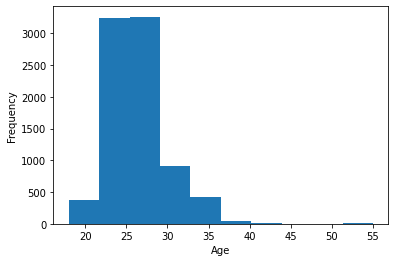

In [5]:
# age distribution of participants
age = dating[np.isfinite(dating['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')
# dating['match'].isnull().sum()
print('二次约会成功率:',dating['match'].sum()/ dating.shape[0],'\n')

可以看到，大多数参与者年龄在22-28之间，仅16%的人在快速约会之后进行二次约会

In [6]:
# 缩减属性
dating_1 = dating.iloc[:, 11:28]
dating_2 = dating.iloc[:, 30:35]
dating_3 = dating.iloc[:, 39:43]
dating_4 = dating.iloc[:, 45:67]
dating_5 = dating.iloc[:, 69:74]
dating_6 = dating.iloc[:, 87:91]
dating_7 = dating.iloc[:, 97:102]
dating_8 = dating.iloc[:, 104:107]

data = pd.concat([dating.iloc[:, 0],dating.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,dating_6,dating_7,dating_8], axis=1)

# 缩减后的缺失值
data.isnull().sum()

iid           0
gender        0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
age          95
field        63
race         63
imprace      79
imprelig     79
from         79
goal         79
date         97
go_out       79
career       89
career_c    138
sports       79
tvsports     79
exercise     79
dining       79
museums      79
art          79
hiking       79
gaming       79
clubbing     79
reading      79
tv           79
theater      79
movies       79
concerts     79
music        79
shopping     79
yoga         79
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
dec           0
attr        202
sinc        277
intel   

In [7]:
data.shape

(8378, 67)

In [8]:
data2 = data.dropna()
# print(data2.dtypes)
# 将object类型数据单独提取出来，编码后再进行相关处理
data3 = data2.drop(['field', 'from', 'career'], axis=1)
data4 = data2[['field', 'from', 'career']]

### 任务1 男性和女性在择偶观差异

1.What Are Participants Looking For in Their Matches

2.What Paricipants Think Their Same-sex Peers Are Looking For

3.What Do Participants Think the Opposite Sex is Looking For


### IF people really know what they want. 

#### 雷达图
图片使用R语言绘制
代码及分析源自https://www.kaggle.com/jph84562/the-ugly-truth-of-people-decisions-in-speed-dating/code

In [17]:
like = data['like']
like

0       7.0
1       7.0
2       7.0
3       7.0
4       6.0
       ... 
8373    2.0
8374    4.0
8375    6.0
8376    5.0
8377    4.0
Name: like, Length: 8378, dtype: float64

In [19]:
like.max()
like.min()

0.0

In [24]:
ids = (data['like']==10)

like = data[ids]

len(like)

182

In [30]:
like_men_id = (like['gender']==1)
like_women_id = (like['gender']==0)
like_men = like[like_men_id]
like_women = like[like_women_id]

In [28]:
like_men

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
120,13,1,1.0,1,0.16,1,21.0,4.0,15.00,20.00,...,8.0,8.0,1,10.0,10.0,10.0,10.0,10.0,10.0,1.0
121,13,1,2.0,0,0.10,0,24.0,2.0,45.00,5.00,...,8.0,8.0,1,10.0,10.0,10.0,10.0,10.0,10.0,2.0
122,13,1,3.0,0,0.09,0,25.0,2.0,35.00,10.00,...,8.0,8.0,1,10.0,10.0,10.0,10.0,10.0,10.0,2.0
123,13,1,4.0,0,0.05,0,23.0,2.0,20.00,20.00,...,8.0,8.0,1,10.0,10.0,10.0,10.0,10.0,10.0,NaN
124,13,1,5.0,0,-0.17,0,21.0,2.0,20.00,5.00,...,8.0,8.0,1,10.0,10.0,10.0,10.0,10.0,10.0,1.0
125,13,1,6.0,0,-0.51,1,23.0,4.0,10.00,25.00,...,8.0,8.0,1,10.0,10.0,10.0,10.0,10.0,10.0,1.0
126,13,1,7.0,0,0.52,1,22.0,4.0,15.00,15.00,...,8.0,8.0,1,10.0,10.0,10.0,10.0,10.0,10.0,NaN
127,13,1,8.0,1,0.42,0,25.0,2.0,9.09,18.18,...,8.0,8.0,1,10.0,10.0,10.0,10.0,10.0,10.0,2.0
128,13,1,9.0,1,0.68,0,26.0,6.0,20.00,10.00,...,8.0,8.0,1,10.0,10.0,10.0,10.0,10.0,10.0,2.0
129,13,1,10.0,1,-0.15,0,26.0,2.0,15.00,15.00,...,8.0,8.0,1,10.0,10.0,10.0,10.0,10.0,10.0,2.0


In [29]:
len(like_men)

108

In [31]:
len(like_women)

74

In [35]:
like_men['career']

120                                                Lawyer
121                                                Lawyer
122                                                Lawyer
123                                                Lawyer
124                                                Lawyer
125                                                Lawyer
126                                                Lawyer
127                                                Lawyer
128                                                Lawyer
129                                                Lawyer
141                                                Lawyer
795                                                LAWYER
796                                                LAWYER
799                                                LAWYER
802                                                LAWYER
806                                                LAWYER
924                         Lawyer or professional surfer
1404          

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

like_men_career = like_men['career'].value_counts()
like_women_career = like_women['career'].value_counts()

In [47]:
type(like_men_career)

pandas.core.series.Series

<IPython.core.display.Javascript object>


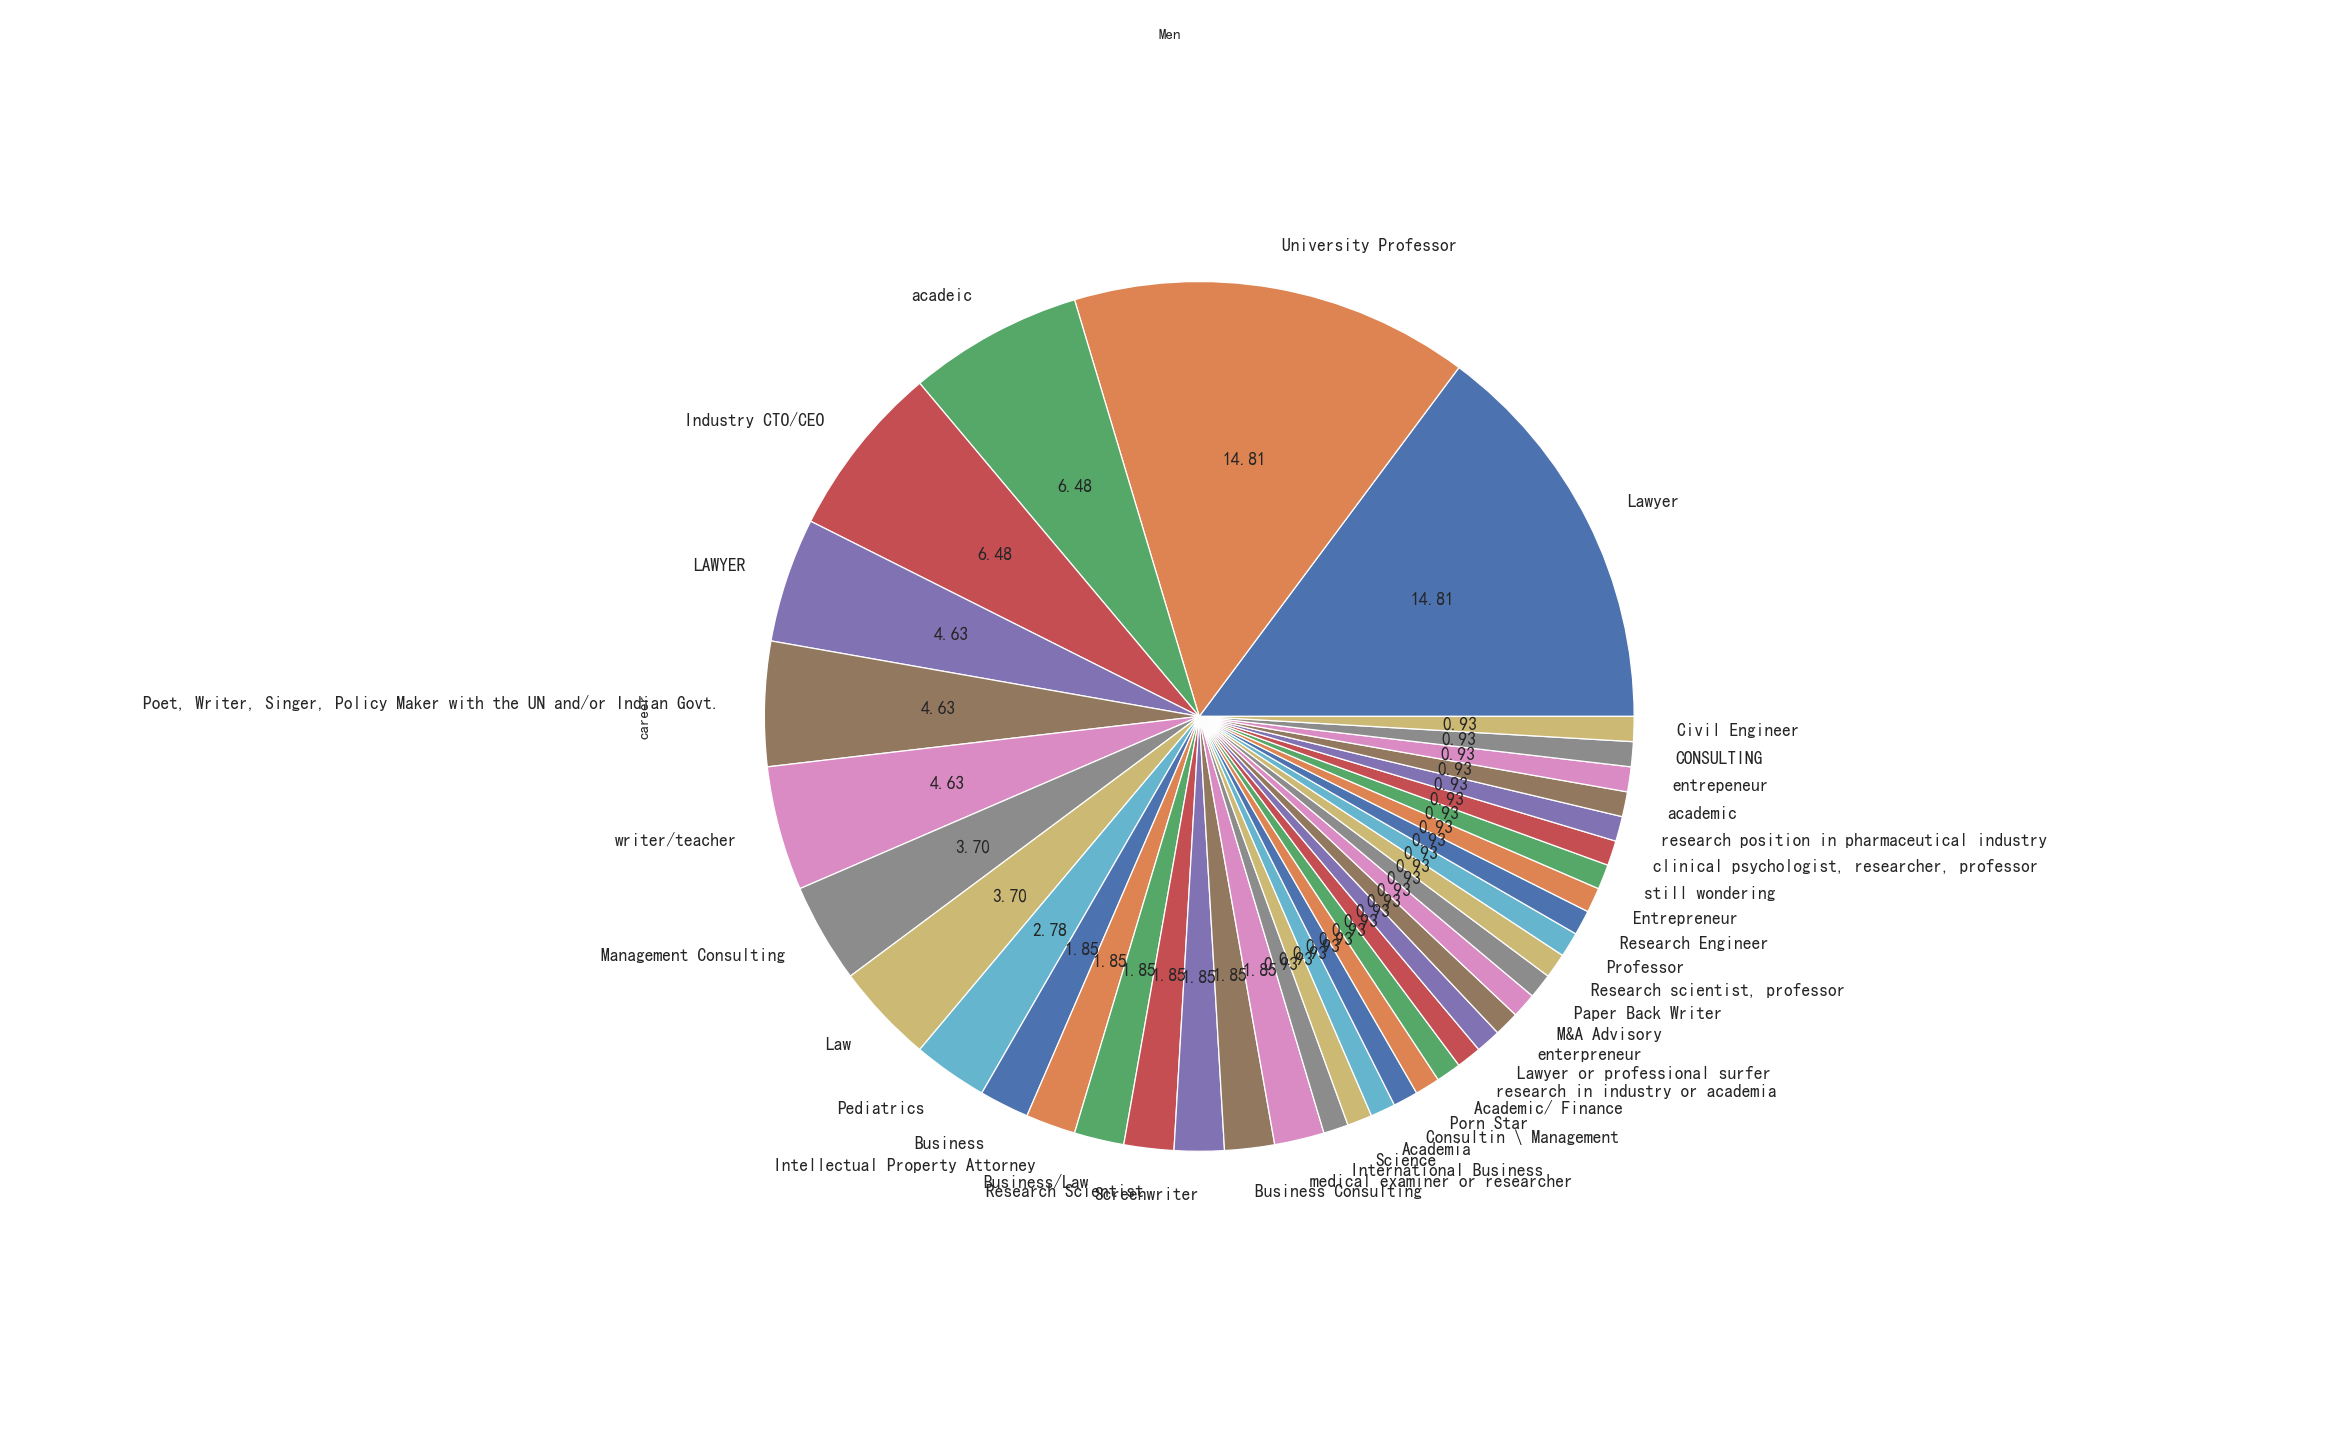

In [82]:
%matplotlib notebook
explode = (0, 0.1, 0, 0)
like_men_career.plot.pie(autopct='%.2f',subplots=True,  legend=False,figsize=(26,16),title='Men',fontsize='14')
plt.savefig('./66.png')

<IPython.core.display.Javascript object>


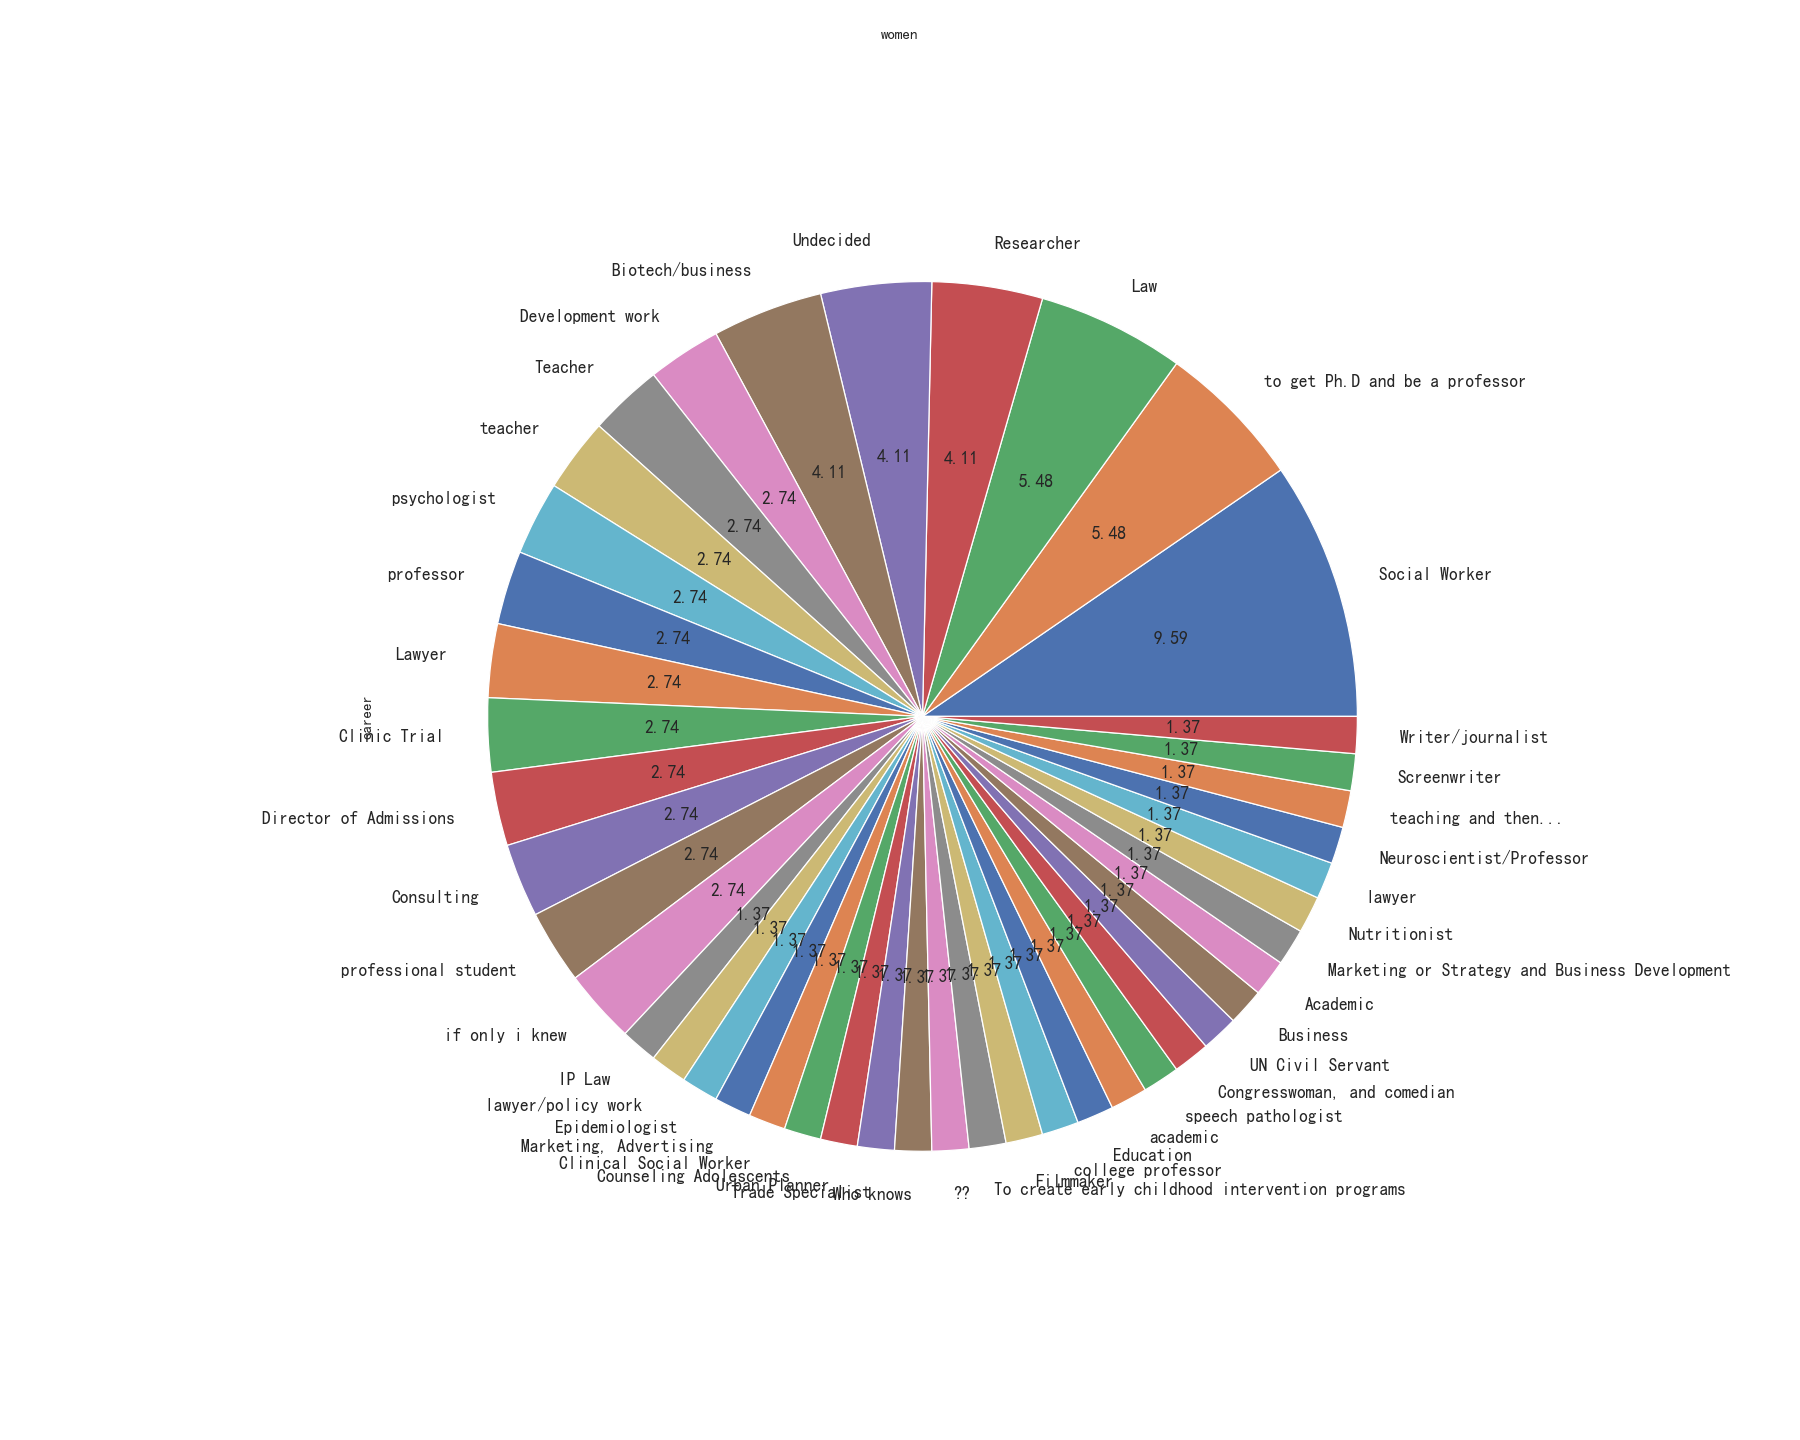

In [85]:
%matplotlib notebook
explode = (0, 0.1, 0, 0)
like_women_career.plot.pie(autopct='%.2f',subplots=True,  legend=False,figsize=(20,16),title='women',fontsize='14')
plt.savefig('./women_career.png')

In [86]:
data['count']

KeyError: 'count'

### 任务2 约会中最受欢迎的男性和女性是什么样（工作、兴趣爱好、品质）

首先需要分析那些人更受欢迎，也就是约会者对参与者的喜爱程度最高，喜爱程度为10的对象

最受欢迎的男性和女性样本：

1.工作条形图

2.兴趣爱好条形图

3.品质条形图

### 任务3 有共同兴趣爱好的约会伙伴是否更容易约会成功

<AxesSubplot:title={'center':'Correlation Heatmap'}>

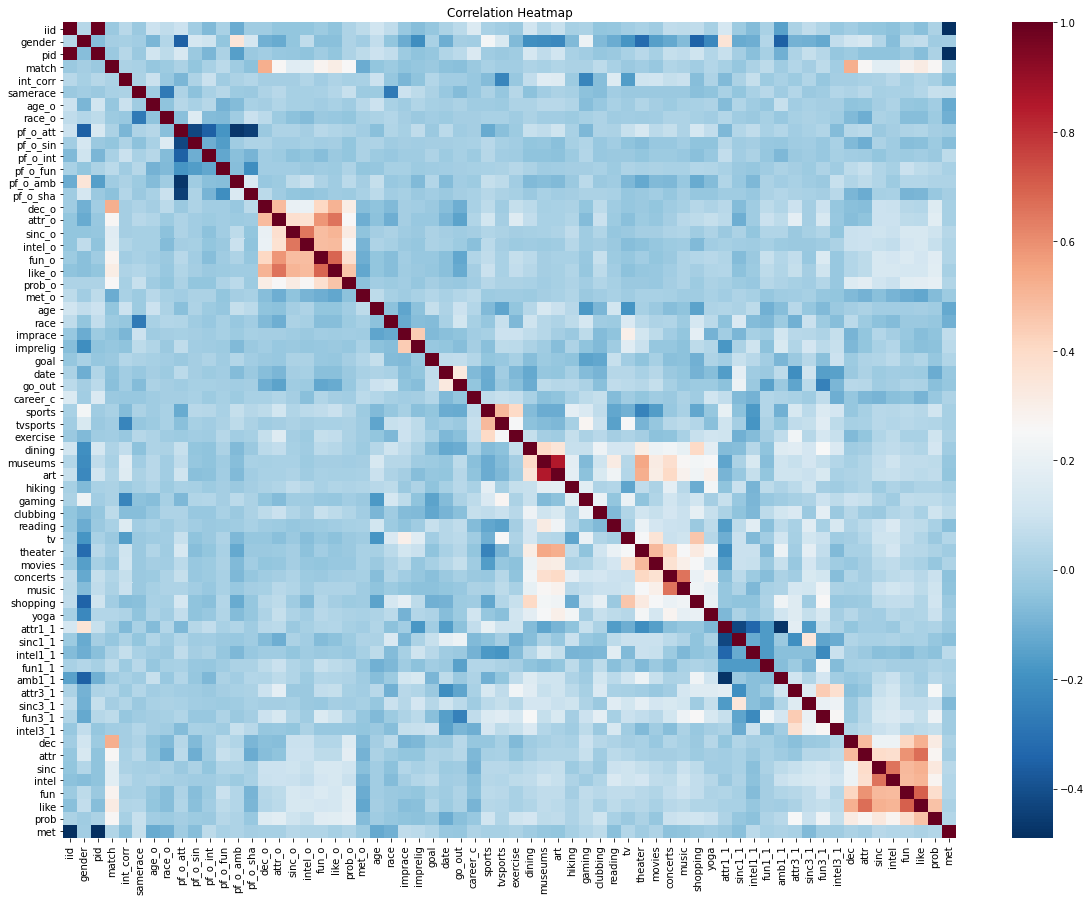

In [9]:
# heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = data3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap='RdBu_r')

从上图中，我们可以知道，男性gender=1,偏爱pf_o_amb,attrl_l,sports,gaming;女性gender=0,偏爱pf_o_att,theater,shopping,ambl_l

In [10]:
data2.shape

(6797, 67)

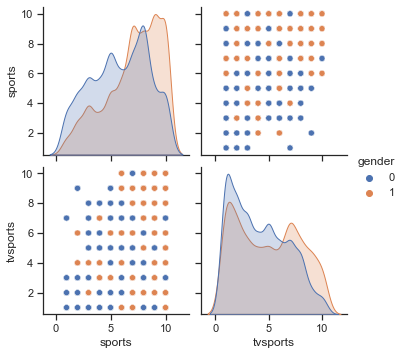

In [11]:
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([data3.iloc[:, 1],data3.iloc[:, 30:32]],axis = 1)
g = sns.pairplot(date_int, hue="gender")

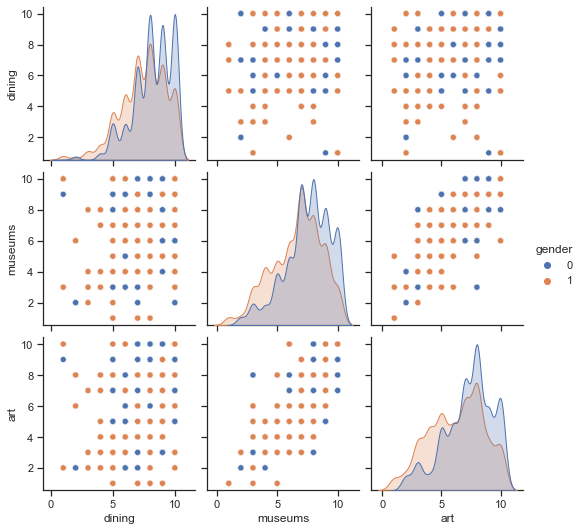

In [12]:
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([data3.iloc[:, 1],data3.iloc[:, 33:36]],axis = 1)
g = sns.pairplot(date_int, hue="gender")

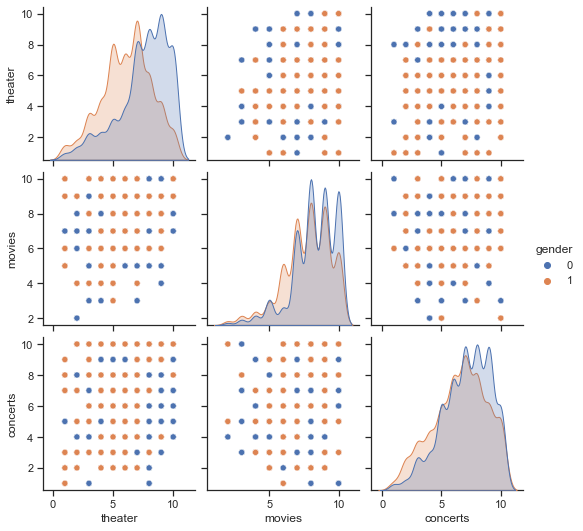

In [13]:
sns.set(style="ticks", color_codes=True)
date_int2 = pd.concat([data3.iloc[:, 1],data3.iloc[:, 41:44]],axis = 1)
g = sns.pairplot(date_int2, hue="gender")

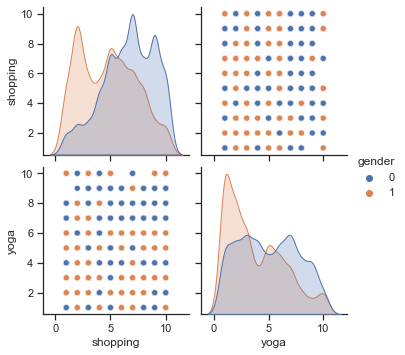

In [14]:
sns.set(style="ticks", color_codes=True)
date_int3 = pd.concat([data3.iloc[:, 1],data3.iloc[:, 45:47]],axis = 1)
g = sns.pairplot(date_int3, hue="gender")

在热图中，没有一个兴趣与match相关

看起来，match 大部分与合作伙伴的决策相关，并且与合作伙伴的属性（他们对合作伙伴的吸引力，诚意，智慧，乐趣，野心以及对他们的满意程度如何评估有关

结果显示，比赛与年龄或种族，甚至参与者和伴侣的兴趣有多相似（int_corr）都不相关

In [15]:
# removing interests
data5 = data3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

### 任务4 预测回归

参考https://www.kaggle.com/minjeongk/the-most-important-attribute-for-men-and-women